#Naive Bayes

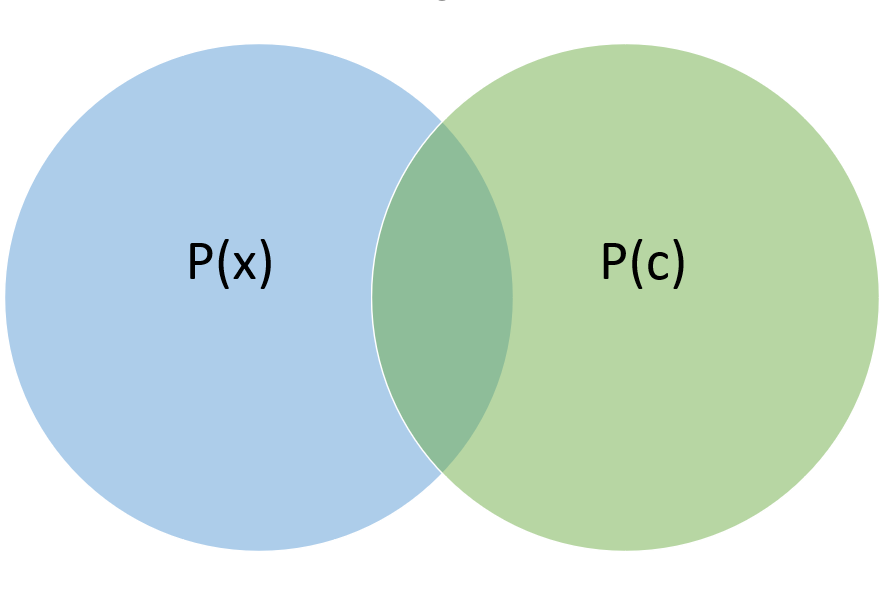

##Introdução

O algoritmo Naive Bayes é uma técnica de classificação supervisionada, baseada no Teorema de Bayes. Ele pressupõe que um recurso em uma classe não está relacionado à presença de qualquer outro recurso, ou seja, o classificador assume que o efeito do valor de um preditor (x) em uma determinada classe (c) é independente dos valores de outros preditores. Essa suposição é chamada de independência condicional de classe. 

P(c|x) = $\frac{P(x|c) * P(c)}{P(x)}$

* P (c | x) - É a probabilidade posterior da classe (alvo) dado um preditor (atributo).
* P (x | c) - A probabilidade do preditor dada a classe. Também conhecido como Likelihood.
* P (c) - É a probabilidade prévia da classe.
* P (x) - É a probabilidade prévia do preditor.

O classificador Naive Bayes é um dos mais fáceis de implementar e tem um desempenho decente, mesmo com pequenos conjuntos de dados de treinamento. 

É também uma das melhores soluções quando se trata de prever a classe dos dados de forma rápida e sem grandes consumos de recursos. 

O Sklearn oferece diferentes algoritmos para vários tipos de problemas. Um deles é o Gaussian Naive Bayes . É usado quando os recursos são variáveis ​​contínuas e assume que os recursos seguem uma distribuição gaussiana. É simples aplicar o modelo de código aberto aos dados. Mas hoje, vamos entender esse algoritmo implementando ele 

##Importar principais bibliotecas

In [1]:
import pandas as pd #Manipulações de dataframes
import numpy as np #Manipulações matemáticas

##Manual

Vamos primeiro aprender como o algoritmo funciona, usando um conjunto simples de dados de metereológicos sobre dias de golf.

###Importar base de dados

In [2]:
dataPrev=pd.read_excel('/content/drive/MyDrive/Dataset_Excel/umidade.xlsx')
dataPrev

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,hot,high,False,no
1,Rainy,hot,high,True,no
2,Overcast,hot,high,False,yes
3,Sunny,mild,high,False,yes
4,Sunny,cool,normal,False,yes
5,Sunny,cool,normal,True,no
6,Overcast,cool,normal,True,yes
7,Rainy,mild,high,False,no
8,Rainy,cool,normal,False,yes
9,Sunny,mild,normal,False,yes


Vamos interpretar nossos dados:

> *Atributos preditores (Servem para prever nosso alvo)*

 * Outlook (Panorama) - Dia chuvoso, ensolarado ou nublado.
 * Temp (Temperatura) - Temperatura está quente, moderada ou fria.
 * Humidity (Umidade) - Umidade alta ou normal
 * Windy (Vento) - Dia com ou sem vento


> *Atributo Classe (Nosso objetivo na previsão, alvo)*

 * Play Golf - Indica se o dia com base na previsão do tempo está bom ou não para jogar golf.


Otimo, agora que já separamos nossas variáveis vamos iniciar a contrução do nosso algoritmo.

A probabilidade posterior pode ser calculada primeiro, construindo uma tabela de frequência para cada atributo em relação à nossa classe (alvo). 
Frequência é basicamente o número de vezes que uma determinada variável assume esse valor. No caso, vamos ver quantas vezes cada variável indica se no dia houve ou não jogo de golf.

In [3]:
def RetornarTabelaFrequencia(dataPrev,coluna):
  return pd.crosstab(index=dataPrev[coluna], columns=dataPrev['Play Golf'])

In [4]:
RetornarTabelaFrequencia(dataPrev,'Outlook')

Play Golf,no,yes
Outlook,,
Overcast,0,4
Rainy,3,2
Sunny,2,3


In [5]:
RetornarTabelaFrequencia(dataPrev,'Temp')

Play Golf,no,yes
Temp,,
cool,1,3
hot,2,2
mild,2,4


In [6]:
RetornarTabelaFrequencia(dataPrev,'Humidity')

Play Golf,no,yes
Humidity,,
high,4,3
normal,1,6


In [7]:
RetornarTabelaFrequencia(dataPrev,'Windy')

Play Golf,no,yes
Windy,,
False,2,6
True,3,3


Em seguida, vamos transformar as tabelas de frequência em tabelas de probabilidade e finalmente usar a equação bayesiana ingênua para calcular a probabilidade posterior para cada classe. A classe com maior probabilidade posterior é o resultado da nossa previsão.

In [8]:
def RetornarTabelaProbabilidade(dataPrev,coluna):
  dataset=RetornarTabelaFrequencia(dataPrev,coluna)

  #Primeiro somaremos as quantidades de sim e não na
  #nossa tabela de frequência
  soma_geral=sum(dataset['yes']+dataset['no'])
  soma_nao=sum(dataset['no'])
  soma_sim=sum(dataset['yes'])  

  #Criaremos uma nova coluna com o total para cada linha e dividir pela quantidade total de registros - P(x)
  dataset['Total']= round((dataset['no']+dataset['yes'])/soma_geral,2)
  
  #Agora criaremos uma nova linha só que com a divisão de cada atributo pelo total - P(c)
  dataset=dataset.append([{'no':round(soma_nao/soma_geral,2),'yes':round(soma_sim/soma_geral,2),'Total':''}])
  
  #P(x|c)
  dataset['no']/=soma_nao 
  dataset['yes']/=soma_sim 
  return dataset

Também calcularemos a probabilidade total de cada classe para posterior uso 

In [9]:
def RetornarProbabilidadeSimNaoGeral(dataPrev):
  dataset=dataPrev['Play Golf']
  soma_geral=dataset.count()
  soma_nao=dataset[dataset=='no'].count()
  soma_sim=dataset[dataset=='yes'].count()  
  return pd.DataFrame([{'no':(soma_nao/soma_geral), 'yes':(soma_sim/soma_geral)}])

In [10]:
Outlook=RetornarTabelaProbabilidade(dataPrev,'Outlook')
Outlook

Play Golf,no,yes,Total
Overcast,0.000,0.444444,0.29
Rainy,0.600,0.222222,0.36
Sunny,0.400,0.333333,0.36
0,0.072,0.071111,


In [11]:
Temp=RetornarTabelaProbabilidade(dataPrev,'Temp')
Temp

Play Golf,no,yes,Total
cool,0.200,0.333333,0.29
hot,0.400,0.222222,0.29
mild,0.400,0.444444,0.43
0,0.072,0.071111,


In [12]:
Humidity=RetornarTabelaProbabilidade(dataPrev,'Humidity')
Humidity

Play Golf,no,yes,Total
high,0.800,0.333333,0.5
normal,0.200,0.666667,0.5
0,0.072,0.071111,


In [13]:
Windy=RetornarTabelaProbabilidade(dataPrev,'Windy')
Windy

Play Golf,no,yes,Total
False,0.400,0.666667,0.57
True,0.600,0.333333,0.43
0,0.072,0.071111,


In [14]:
probabilidadeGeral=RetornarProbabilidadeSimNaoGeral(dataPrev)
probabilidadeGeral

,no,yes
0,0.357143,0.642857


Perfeito, calculamos toda nossa tabela. Agora vamos fazer prever o resultado de um novo registro fora da base de dados com as características abaixo.

Rainy - cool - high - true

Vamos criar uma tabela de probabilidade geral com base nas condições acima e aplicá-las nas outras tabelas de probabilidade. Para simplificar a visualização vamos plotar tudo num dataframe único

In [15]:
tabelaProbabilidadesGeral= pd.concat([Outlook[Outlook.index=='Rainy'],
                                      Temp[Temp.index=='cool'],
                                      Humidity[Humidity.index=='high'],
                                      Windy[Windy.index==True],
                                      probabilidadeGeral])[['no','yes']]
tabelaProbabilidadesGeral                        

,no,yes
Rainy,0.600000,0.222222
cool,0.200000,0.333333
high,0.800000,0.333333
True,0.600000,0.333333
0,0.357143,0.642857


Agora vamos multiplar as probabilidades de sim e não e vermos o resultado final. Lembre-se: Aquele com o maior probabilidade será o resultado do nosso algoritmo.

As probabilidades posteriores finais podem ser padronizadas entre 0 e 1.

P(Yes | X) = P(Rainy | Yes) * P(Cool | Yes) * P(High | Yes) * P(True | Yes) * P(Yes)

P(No | X) = P(Rainy | No) * P(Cool | No) * P(High | No) * P(True | No) * P(No)

In [16]:
print('Não: ', round((0.600 * 0.200 * 0.800 * 0.600 * 0.35714285714285715),4))
print('Sim: ', round((0.222222 * 0.333333 * 0.333333 * 0.333333	 * 0.6428571428571429),4))   

Não:  0.0206
Sim:  0.0053


Outra forma de calcular multiplicar todas as linhas da coluna seria calcular os logaritmos da coluna, depois somá-los e então pegar o exponencial desse resultado.

In [17]:
probNao=round(np.exp(sum(np.log(tabelaProbabilidadesGeral['no']))),4)
probSim=round(np.exp(sum(np.log(tabelaProbabilidadesGeral['yes']))),4)
print('Não:',probNao)
print('Sim:',probSim) 

Não: 0.0206
Sim: 0.0053


Bom ou não, agora sabemos que nosso dia não será para golf. O resultado do não é superior ao do sim com 79,54% de certeza.

In [18]:
print('% Não: ',round(probNao/(probNao+probSim),4)*100)
print('% Sim: ',round(probSim/(probNao+probSim),4)*100) 

% Não:  79.54
% Sim:  20.46


##Sklearn

Agora que sabemos como o algoritmo funciona, vamos fazer isso de uma forma mais fácil utilizando o algoritmo já implementado na biblioteca Sklearn.

###Importar Libs

In [19]:
from sklearn.naive_bayes import GaussianNB #Algoritmo Naive Bayes
from sklearn.preprocessing import LabelEncoder #Usado para transformar variáveis categóricas em numéricas

###Preparação dos dados

Separar os atributos preditores da classe 

In [20]:
X=dataPrev.iloc[:,0:4]
y=dataPrev.iloc[:,4]

Agora para o algoritmo implementado pelo Sklearn vamos precisar transformar nossos atributos categóricos em numéricas, porém não são quantitativas, pois ainda representam as categorias. Usaremos o LabelEncoder, que basicamente atribuirá um numero inteiro diferente para cada categoria de cada coluna.

In [21]:
classEncoder=LabelEncoder()
X.iloc[:,0]=classEncoder.fit_transform(X.iloc[:,0])
X.iloc[:,1]=classEncoder.fit_transform(X.iloc[:,1])
X.iloc[:,2]=classEncoder.fit_transform(X.iloc[:,2])
X.iloc[:,3]=classEncoder.fit_transform(X.iloc[:,3])

Agora que nossos dados estão categóricos numéricos, vamos criar um objeto do Sklearn Naive Bayes (GaussianNB) e treiná-lo com nossos dados.

In [22]:
naive_bayes_golf=GaussianNB()
naive_bayes_golf.fit(X,y);

Agora que temos nosso algoritmo treinado, vamos introduzir o mesmo registro do nosso teste manual e ver a saída dele. 

OBS: Lembre-se que ele também deve ser passado como uma categoria numérica. Caso queira saber quais números representam cada categoria, pegue a base original e compare com a modificada.

In [23]:
naive_bayes_golf.predict([[1,0,0,1]])

array(['no'], dtype='<U3')

Nosso objeto naive bayes também nos dá outros insights. Podemos juntar todos eles e plotar num dataframe.

Classes identificadas da nossa variável y

In [24]:
resultado_classes=naive_bayes_golf.classes_
resultado_classes

array(['no', 'yes'], dtype='<U3')

A quantidade de cada classse da nossa variável y

In [25]:
resultado_contagem=naive_bayes_golf.class_count_
resultado_contagem

array([5., 9.])

A probabilidade posterior identificada para nossas classes P(c)

In [26]:
resultado_classe_posterior=naive_bayes_golf.class_prior_ 
resultado_classe_posterior

array([0.35714286, 0.64285714])

A probabilidade resultante da nossa previsão (Como o resultado é um array de 2 dimensões vamos usar um reshape para diminuirmos 1 e plortarmos no nosso dataFrame)

In [27]:
resultado_previsao=naive_bayes_golf.predict_proba([[1,0,0,1]]).reshape(-1)
resultado_previsao

array([0.73326914, 0.26673086])

In [28]:
pd.DataFrame({'Classes':resultado_classes,
              'Contagem':resultado_contagem,
              'Probabilidade Posterior Classe':resultado_classe_posterior,
              'Probabilidade Previsão':resultado_previsao})

,Classes,Contagem,Probabilidade Posterior Classe,Probabilidade Previsão
0,no,5.0,0.357143,0.733269
1,yes,9.0,0.642857,0.266731


Veja que nossa probabilidade de previsão manual se aproximou bastante de um algoritmo com padronização Gaussiana 

##Exemplo de análise do dia a dia

Agora que vimos como o algoritmo se comporta, vamos pegar um outro dataset e realizar análises mais amplas antes da criação do modelo. 

###Importar Libs

In [29]:
import seaborn as sns #Visualização gráfica
from sklearn.model_selection import train_test_split #Usado para separar a base de dados 
from yellowbrick.classifier import ConfusionMatrix #Usado para verificar os erros do nosso algoritmo
from sklearn.preprocessing import StandardScaler #Usado para padronizar as variáveis
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score #Métricas de qualidade do modelo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


###Carregar base de dados

De acordo com o próprio site hospedador do dataset (Machine Learning Repository):

Este é talvez o banco de dados mais conhecido que pode ser encontrado na literatura de reconhecimento de padrões. O artigo de Fisher é um clássico na área e é referenciado com frequência até hoje. (Veja  Duda & Hart, por exemplo.) O conjunto de dados contém 3 classes de 50 instâncias cada, onde cada classe se refere a um tipo de planta de íris. Uma classe é linearmente separável das outras 2; os últimos NÃO são linearmente separáveis ​​uns dos outros.

https://archive.ics.uci.edu/ml/datasets/iris

In [30]:
iris=pd.read_csv('/content/drive/MyDrive/Dataset_Excel_CSV/IrisData.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


* Informações relevantes da base de dados 

  > Preditores
  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

  > Classe
  5. Species: (Iris Setosa, Iris Versicolour, Iris Virginica)

OBS: Nosso objetivo é utilizar os atributos acima (O Id não está na relação por não servir ao nosso propósito de análise), para identificar a espécie da flor.

###Analisar valores nulos

Antes de mais nada, devemos tentar identificar valores faltantes na base de dados. O algoritmo não funcionará se houver valores NaN na base de dados.

In [31]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Perfeito! Sem trabalho extra nessa parte. Outra forma de visualizar isso é por um "Mapa de Calor" que deixa em evidência valores nulos.

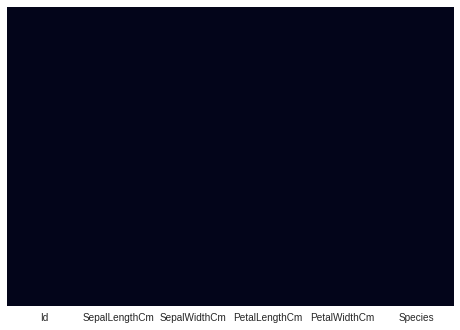

In [32]:
sns.heatmap(iris.isnull(), yticklabels=False,cbar=False);

Nada. Para melhor exemplificar como ficaria, vamos criar um dataframe, com os dados copiados do Iris e adicionar nele alguns valores nulos.

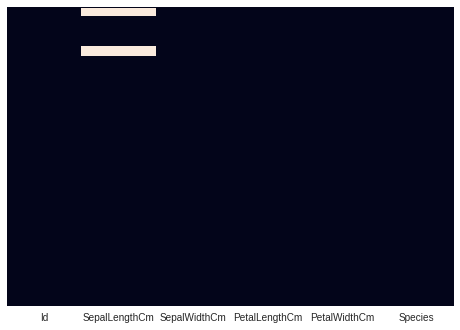

In [33]:
irisTesteNulos=iris.copy()
irisTesteNulos.iloc[1:5,1]=np.NaN 
irisTesteNulos.iloc[20:25,1]=np.NaN
sns.heatmap(irisTesteNulos.isnull(), yticklabels=False,cbar=False);

O Heatpmap é um ótimo jeito para ter insights rápidos e gráficos.

###Separar atributos preditores e classe

Agora vamos separar nosso atributos preditores da nossa classe. 

Obs: Lembre-se que não usaremos o ID e por isso o indice do X iniciará em 1 ao invés de 0.

In [34]:
x_iris=iris.iloc[:,1:5].values
y_iris=iris.iloc[:,5].values

###Padronizar os atributos

Apesar de ser um algoritmo categórico, vimos que o Sklearn precisa do labelEncoder para trabalhar corretamente, visto que é uma variante do tradicional. O Naive Bayes Gaussiano, se baseia em dados contínuos e estão normalmente distribuidos (Padronização). 

Como os dados estão em escala um pouco diferente vamos padroniza-los (z-score) entre 0 e 1. 

In [35]:
scaler=StandardScaler()
x_iris=scaler.fit_transform(x_iris)

###Separar em treinamento e teste

Agora, vamos separar nossos registros em bases de teste e treinamento. 
* Treinamento: Usaremos esses registros para aprimorar a eficiência do nosso algoritmo. Devem ser a maior parte dos nossos dados. 
* Teste: Usaremos esses para avaliar se nosso algoritmo está condizente com a realidade já vista.

Para esse exemplo, usaremos 70% da base como treinamento.

In [36]:
X_train, X_test, y_train, y_test= train_test_split(x_iris,y_iris,train_size=0.70,random_state=1)

Vamos ver como ficaram distribuídas as variáveis.

In [37]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

###Utilizar Modelo

Enfim chegamos à parte da criação e uso de nosso algoritmo. Dessa vez além de treinar o modelo, faremos predições com grandes quantidades para constatar sua precisão.

In [42]:
n_naive_iris=GaussianNB()
n_naive_iris.fit(X_train,y_train);
previsoes=n_naive_iris.predict(X_test)
previsoes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype='<U15')

###Verificar Previsões

Após finalizado, podemos verificar o quanto nosso algoritmo foi preciso com suas previsões

In [39]:
accuracy_score(y_test,previsoes)

0.9333333333333333

Muito bom, mas onde nosso algoritmo errou. Podemos verificar um a um ou utilizar uma demonstração gráfica mais eficiente. É para isso que serve a matriz de Confusão

0.9333333333333333

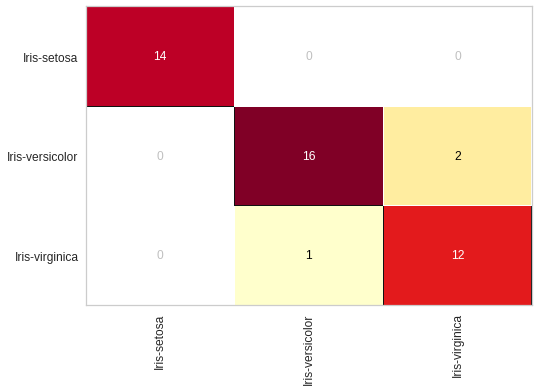

In [40]:
cm=ConfusionMatrix(n_naive_iris)
cm.fit(X_train,y_train)
cm.score(X_test,y_test)

Dessa vez, não só temos à acurácia como também temos essa matriz. Mas como interpretá-la?

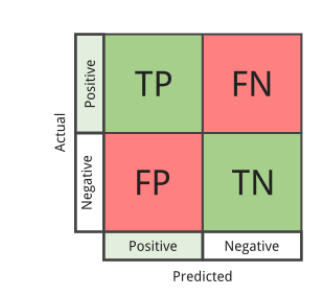

Figura 1: Forma de interpretar uma matriz de confusão.
[Matthew Lee](https://towardsdatascience.com/visual-guide-to-the-confusion-matrix-bb63730c8eba)

Basicamente de forma resumida: as Diagonais principais representam nossos acertos (Sejam eles positivos ou negativos) e o restante erros (também positivos ou negativos)

Exemplo: 

Verdadeiro Positivo: 14 Plantas que eram Iris Setosas foram devidamente classificada como Iris Setosa.
Verdadeiro Negativo: Qualquer outra das diagonais que não sejam Iris Setosas, foram devidamente catalogadas com suas espécies.
Falsos Positivos: 2 Plantas Iris Versicolor foram catalogadas de forma errada como Iris Virginica.
Falsos Negativos: O restante das previsões que não sejam Versicolor que foram catalogadas de forma errada

Como vimos nosso algoritmo ficou bem aderente, mas só a acurácia é uma boa medida? Vamos explorar mais a fundo abaixo com o classification_report

In [41]:
print(classification_report(y_test,previsoes))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.89      0.91        18
 Iris-virginica       0.86      0.92      0.89        13

       accuracy                           0.93        45
      macro avg       0.93      0.94      0.93        45
   weighted avg       0.94      0.93      0.93        45



Agora vamos entender o que cada uma representa:

> Legendas
  - VP (Verdadeiros Positivos)
  - FP (Falsos Positivos)
  - FN (Falsos Negativos)

> Interpretação
* Precision: Acurácia de Verdadeiros positivos (VP/(VP+FP)).
* Recall: Fração de positivos que foram identificados corretamente (VP/(VP+FN)). 
* f1-score: Porcentagem de previsões positivas corretas (média harmônica ponderada do precision e Recall) (2 * (Recall * Precision) / (Recall + Precision)) 
* support: Quantidade de acertos.

Como vimos, o classificador Naive Bayes é um algoritmo que apesar de simples é realmente bem poderoso em realizar previsões.